In [ ]:
import os

# Klasör yolunu belirleyin
base_path = "kayıt-dosyaları"

# Dosya yollarını ve etiketlerini saklayacak listeler
file_paths = []
labels = []

# Klasörleri gezerek dosyaları ve etiketlerini listeleyin
for class_folder in os.listdir(base_path):
    class_path = os.path.join(base_path, class_folder)
    if os.path.isdir(class_path):  # Eğer klasörse
        for file_name in os.listdir(class_path):
            if file_name.endswith(".wav"):  # Sadece .wav dosyalarını ekleyin
                file_paths.append(os.path.join(class_path, file_name))
                labels.append(class_folder)  # Klasör adı etikettir

print(f"Toplam {len(file_paths)} dosya yüklendi.")
print(f"Örnek etiketler: {set(labels)}")


Toplam 3988 dosya yüklendi.
Örnek etiketler: {'arttır', 'evi', 'azalt', 'yeşil', 'ışığı', 'kapa', 'perdeyi', 'nemlendir', 'düşür', 'aç', 'fanı', 'kıs', 'soğut', 'mavi', 'evet', 'ısıt', 'aydinlatmayı', 'panjuru', 'ısıtmayı', 'odayı', 'sıcaklığı', 'parlaklığı', 'kırmızı', 'alarmı', 'hayır', 'iklimlendirmeyi', 'multimedyayı'}


In [1]:
import zipfile

# ZIP dosyasının yolu
zip_file_path = "kayıt-dosyaları.zip"  # ZIP dosyasının adı veya yolu

# Çıkarma işlemi
try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Bulunduğu klasöre çıkar
        zip_ref.extractall()
        print(f"Dosyalar başarıyla '{zip_file_path}' dosyasının bulunduğu klasöre çıkarıldı.")
except FileNotFoundError:
    print(f"ZIP dosyası '{zip_file_path}' bulunamadı.")
except zipfile.BadZipFile:
    print("Geçersiz bir ZIP dosyası.")


Dosyalar başarıyla 'kayıt-dosyaları.zip' dosyasının bulunduğu klasöre çıkarıldı.


In [ ]:
import librosa
import numpy as np

# Özellik çıkarma fonksiyonu
def extract_mfcc(file_path, n_mfcc=13):
    audio, sr = librosa.load(file_path, sr=None)  # Orijinal örnekleme hızında yükle
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)  # MFCC çıkar
    return np.mean(mfccs.T, axis=0)  # Zaman boyunca ortalama al

# Örnek bir dosyadan özellik çıkarma
mfcc_features = extract_mfcc(file_paths[0])
print(f"MFCC özellik boyutu: {mfcc_features.shape}")


MFCC özellik boyutu: (13,)


In [ ]:
pip install librosa

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 401.2 kB/s eta 0:00:001m401.4 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 637.2 kB/s eta 0:00:001m614.5 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 222.4 kB/s eta 0:00:00m eta 0:00:010:00:03
  Attempting uninstall: soundfile
    Found existing installation: soundfile 0.11.0
    Uninstalling soundfile-0.11.0:
      Successfully uninstalled soundfile-0.11.0
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd

# Tüm dosyalar için özellik çıkarma
features = [extract_mfcc(file) for file in file_paths]

# Özellikleri ve etiketleri birleştirerek DataFrame oluşturun
df = pd.DataFrame(features)
df['label'] = labels
print(df.head())


            0           1          2          3          4          5  \
0 -383.545837   79.567940  20.253813  24.892801   2.938621   4.495948   
1 -369.405884   75.264885   6.861540  21.129545   5.989508  -4.646102   
2 -439.202759   91.330986  24.033697  17.934696  -3.740450   4.498583   
3 -388.474976   94.670784  30.199080  21.848322  10.693582  -1.251298   
4 -297.837830  136.802078  21.630886  -5.589848  -8.690570 -10.261692   

           6          7          8         9         10        11        12  \
0  -4.166045  -4.717775  -2.073000 -1.372487  -5.397401 -3.223679 -8.255596   
1  -9.545326 -10.046660 -16.006716 -1.177825 -11.069167 -3.731347 -4.421362   
2  -6.059135 -11.681849  -3.296368 -6.804731  -0.163484 -3.172430  0.861833   
3  -3.825018  -2.069556  -8.370687 -4.488630  -7.606600 -0.585615  2.885210   
4 -19.987509 -21.627689  -6.353678 -0.424796  -2.753311 -1.998951 -5.765613   

  label  
0  fanı  
1  fanı  
2  fanı  
3  fanı  
4  fanı  


In [ ]:
print(len(file_paths))  # Dosya sayısı
print(df.shape[0])      # DataFrame satır sayısı


3988
3988


In [ ]:
print(df['label'].value_counts())  # Etiketlerin dağılımını kontrol edin


fanı               154
panjuru            154
evi                154
kırmızı            154
mavi               154
aç                 154
ısıtmayı           154
ısıt               154
perdeyi            154
kapa               154
düşür              154
nemlendir          154
kıs                154
arttır             154
iklimlendirmeyi    154
azalt              154
alarmı             154
odayı              154
soğut              154
parlaklığı         154
multimedyayı       154
yeşil              154
ışığı              154
sıcaklığı          154
aydinlatmayı       154
hayır               69
evet                69
Name: label, dtype: int64


In [ ]:
print(df.iloc[0, :-1].shape)  # Özellik sütunlarının sayısını kontrol edin


(13,)


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["label"])  # Özellikler
y = df["label"]                 # Etiketler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(f"Eğitim verisi: {X_train.shape}, Test verisi: {X_test.shape}")


Eğitim verisi: (3190, 13), Test verisi: (798, 13)


In [ ]:
def extract_spectrogram(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    return log_mel_spectrogram

# Örnek bir dosya için spectrogram çıkarma
spectrogram = extract_spectrogram(file_paths[0])
print(f"Spectrogram boyutu: {spectrogram.shape}")


Spectrogram boyutu: (128, 63)


In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# TensorFlow'u CPU ile çalıştırır
import tensorflow as tf
print("TensorFlow cihazları:", tf.config.list_physical_devices())


TensorFlow cihazları: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [2]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

# GPU kullanımı devre dışı bırak
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Veri yolu
base_path = "kayıt-dosyaları"

# Dosya yolları ve etiketleri toplama
file_paths = []
labels = []

for class_folder in os.listdir(base_path):
    class_path = os.path.join(base_path, class_folder)
    if os.path.isdir(class_path):
        for file_name in os.listdir(class_path):
            if file_name.endswith(".wav"):
                file_paths.append(os.path.join(class_path, file_name))
                labels.append(class_folder)

print(f"Toplam {len(file_paths)} dosya yüklendi.")
print(f"Etiketler: {set(labels)}")

import numpy as np

def extract_spectrogram_fixed_size(file_path, target_shape=(128, 128)):
    try:
        audio, sr = librosa.load(file_path, sr=None)
        mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
        log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
        # NumPy ile yeniden boyutlandırma
        resized = np.resize(log_mel_spectrogram, target_shape)
        return resized
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


# Sabit boyutlu spectrogram özellikleri çıkarma
valid_features = []
valid_labels = []

for file, label in zip(file_paths, labels):
    feature = extract_spectrogram_fixed_size(file)
    if feature is not None:
        valid_features.append(feature)
        valid_labels.append(label)

print(f"Geçerli dosya sayısı: {len(valid_features)}")


# Etiketleri sayısal forma çevirme
label_mapping = {label: idx for idx, label in enumerate(sorted(set(valid_labels)))}

# Eğitim ve test verilerini ayırma
if len(valid_features) > 0 and len(valid_labels) > 0:
    X_train, X_test, y_train, y_test = train_test_split(
        np.array(valid_features),
        np.array([label_mapping[label] for label in valid_labels]),
        test_size=0.2,
        stratify=[label_mapping[label] for label in valid_labels],
        random_state=42
    )
    # Giriş şekline kanal ekleme (CNN için)
    X_train = X_train[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    print(f"Eğitim verisi boyutu: {X_train.shape}, Test verisi boyutu: {X_test.shape}")
else:
    print("Geçerli veri bulunamadı. Dosyaları kontrol edin.")


import numpy as np

def hanning(M):
    """Generate a Hanning window."""
    if M < 1:
        return np.array([])
    elif M == 1:
        return np.ones(1, 'd')
    else:
        n = np.arange(0, M)
        return 0.5 - 0.5 * np.cos(2.0 * np.pi * n / (M - 1))



Toplam 3988 dosya yüklendi.
Etiketler: {'iklimlendirmeyi', 'fanı', 'ısıtmayı', 'kıs', 'parlaklığı', 'aydinlatmayı', 'arttır', 'sıcaklığı', 'kırmızı', 'perdeyi', 'odayı', 'panjuru', 'hayır', 'soğut', 'nemlendir', 'alarmı', 'mavi', 'yeşil', 'düşür', 'evet', 'ısıt', 'multimedyayı', 'aç', 'evi', 'ışığı', 'azalt', 'kapa'}
Geçerli dosya sayısı: 3988
Eğitim verisi boyutu: (3190, 128, 128, 1), Test verisi boyutu: (798, 128, 128, 1)


In [8]:
##ML MODELLERİ

/home/neslihan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
2025-01-24 22:39:37.735288: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-24 22:39:37.760681: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-24 22:39:37.938390: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-24 22:39:37.940565: I tensorflow/core/platform/cp

A total of 3988 files have been loaded.
Labels: {'parlaklığı', 'evi', 'perdeyi', 'soğut', 'ısıtmayı', 'ışığı', 'kıs', 'odayı', 'azalt', 'sıcaklığı', 'hayır', 'arttır', 'mavi', 'iklimlendirmeyi', 'alarmı', 'nemlendir', 'kapa', 'fanı', 'kırmızı', 'aç', 'düşür', 'evet', 'ısıt', 'aydinlatmayı', 'multimedyayı', 'panjuru', 'yeşil'}
Valid LSTM feature count: 3988
LSTM Training Data: (3190, 63, 30), Test Data: (798, 63, 30)


2025-01-24 22:40:00.034308: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-01-24 22:40:00.248305: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-24 22:40:00.249007: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-24 22:40:00.249630: I tensorflow/core/com

Epoch 1/20


2025-01-24 22:40:00.370001: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-24 22:40:00.370951: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-24 22:40:00.371609: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

100/100 [==============================] - ETA: 0s - loss: 3.2395 - accuracy: 0.0668

2025-01-24 22:40:06.780572: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-24 22:40:06.781303: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-24 22:40:06.782017: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

100/100 [==============================] - 7s 44ms/step - loss: 3.2395 - accuracy: 0.0668 - val_loss: 2.9373 - val_accuracy: 0.1541
Epoch 2/20
100/100 [==============================] - 5s 49ms/step - loss: 2.6263 - accuracy: 0.1806 - val_loss: 2.2573 - val_accuracy: 0.2757
Epoch 3/20
100/100 [==============================] - 4s 37ms/step - loss: 2.0680 - accuracy: 0.3361 - val_loss: 1.8405 - val_accuracy: 0.3835
Epoch 4/20
100/100 [==============================] - 4s 36ms/step - loss: 1.6411 - accuracy: 0.4658 - val_loss: 1.3166 - val_accuracy: 0.5752
Epoch 5/20
100/100 [==============================] - 4s 35ms/step - loss: 1.2772 - accuracy: 0.5887 - val_loss: 1.0556 - val_accuracy: 0.6579
Epoch 6/20
100/100 [==============================] - 4s 35ms/step - loss: 1.0193 - accuracy: 0.6740 - val_loss: 0.8645 - val_accuracy: 0.7318
Epoch 7/20
100/100 [==============================] - 3s 35ms/step - loss: 0.8939 - accuracy: 0.7279 - val_loss: 0.8033 - val_accuracy: 0.7657
Epoch 8/20

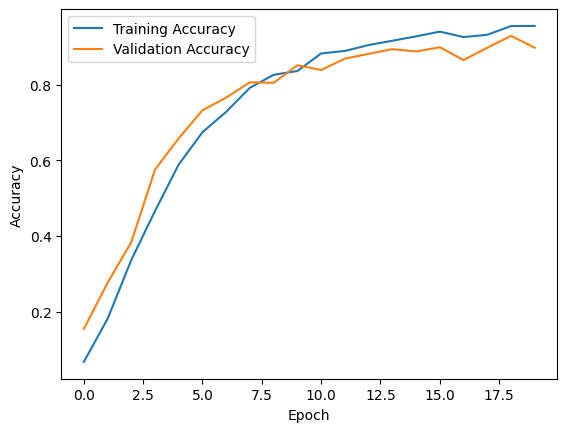

2025-01-24 22:41:18.218636: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-24 22:41:18.219546: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-24 22:41:18.220176: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

25/25 [==============================] - 1s 12ms/step


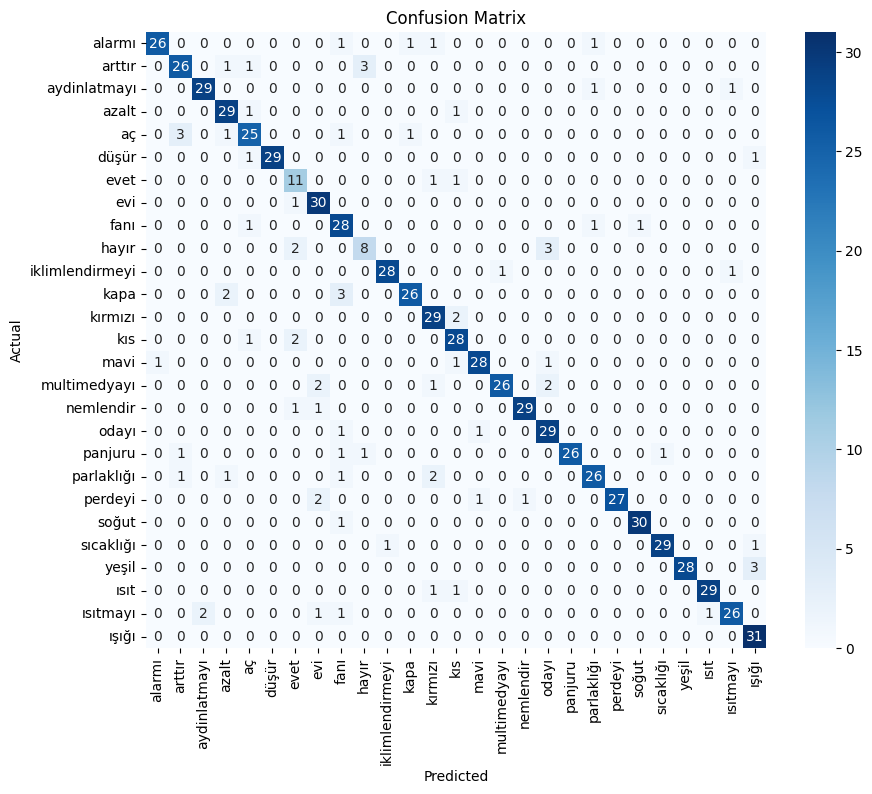

                 precision    recall  f1-score   support

         alarmı       0.96      0.87      0.91        30
         arttır       0.84      0.84      0.84        31
   aydinlatmayı       0.94      0.94      0.94        31
          azalt       0.85      0.94      0.89        31
             aç       0.83      0.81      0.82        31
          düşür       1.00      0.94      0.97        31
           evet       0.65      0.85      0.73        13
            evi       0.83      0.97      0.90        31
           fanı       0.74      0.90      0.81        31
          hayır       0.67      0.62      0.64        13
iklimlendirmeyi       0.97      0.93      0.95        30
           kapa       0.93      0.84      0.88        31
        kırmızı       0.83      0.94      0.88        31
            kıs       0.82      0.90      0.86        31
           mavi       0.93      0.90      0.92        31
   multimedyayı       0.96      0.84      0.90        31
      nemlendir       0.97    

In [1]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import time

# Disable GPU usage
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Data path
base_path = "kayıt-dosyaları"

# Collect file paths and labels
file_paths, labels = [], []
for class_folder in os.listdir(base_path):
    class_path = os.path.join(base_path, class_folder)
    if os.path.isdir(class_path):
        for file_name in os.listdir(class_path):
            if file_name.endswith(".wav"):
                file_paths.append(os.path.join(class_path, file_name))
                labels.append(class_folder)

print(f"A total of {len(file_paths)} files have been loaded.")
print(f"Labels: {set(labels)}")

# Feature extraction function (MFCC)
def extract_mfcc_features(file_path, n_mfcc=30):
    try:
        audio, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
        return mfccs.T  # Return as a time series
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Feature extraction
lstm_features, lstm_labels = [], []
for file, label in zip(file_paths, labels):
    feature = extract_mfcc_features(file)
    if feature is not None:
        lstm_features.append(feature)
        lstm_labels.append(label)

print(f"Valid LSTM feature count: {len(lstm_features)}")

# Convert labels to numeric format
lstm_label_mapping = {label: idx for idx, label in enumerate(sorted(set(lstm_labels)))}
lstm_numeric_labels = [lstm_label_mapping[label] for label in lstm_labels]

# Pad all inputs to the same length
max_length = max([feature.shape[0] for feature in lstm_features])
padded_features = np.array([np.pad(feature, ((0, max_length - feature.shape[0]), (0, 0))) for feature in lstm_features])

# Split data into training and testing sets
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    padded_features,
    np.array(lstm_numeric_labels),
    test_size=0.2,
    stratify=lstm_numeric_labels,
    random_state=42
)

# Convert labels to categorical
y_train_lstm = to_categorical(y_train_lstm, num_classes=len(lstm_label_mapping))
y_test_lstm = to_categorical(y_test_lstm, num_classes=len(lstm_label_mapping))

print(f"LSTM Training Data: {X_train_lstm.shape}, Test Data: {X_test_lstm.shape}")

# LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(max_length, X_train_lstm.shape[2])),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(len(lstm_label_mapping), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

start_train_time = time.time()
history = model.fit(
    X_train_lstm, y_train_lstm,
    epochs=20,
    validation_data=(X_test_lstm, y_test_lstm),
    batch_size=32,
    callbacks=[early_stopping]
)
train_time = time.time() - start_train_time

# Save the LSTM model
model.save("lstm_model.h5")
print("The LSTM model has been successfully saved as 'lstm_model.h5'.")

# Test accuracy
start_test_time = time.time()
test_loss, test_accuracy = model.evaluate(X_test_lstm, y_test_lstm)
test_time = time.time() - start_test_time

print(f"LSTM Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Training Time: {train_time:.2f} seconds, Test Time: {test_time:.2f} seconds")

# Visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predictions and confusion matrix
y_pred = np.argmax(model.predict(X_test_lstm), axis=1)
y_true = np.argmax(y_test_lstm, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=lstm_label_mapping.keys(), yticklabels=lstm_label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_true, y_pred, target_names=lstm_label_mapping.keys()))


Total 3988 files loaded.
Labels: {'evi', 'hayır', 'düşür', 'alarmı', 'panjuru', 'aydinlatmayı', 'odayı', 'kapa', 'aç', 'parlaklığı', 'sıcaklığı', 'fanı', 'ısıt', 'kıs', 'yeşil', 'nemlendir', 'mavi', 'multimedyayı', 'evet', 'azalt', 'arttır', 'ışığı', 'perdeyi', 'soğut', 'ısıtmayı', 'kırmızı', 'iklimlendirmeyi'}
Valid ML feature count: 15952
Evaluating Random Forest...
Random Forest Average Accuracy: 0.94
Random Forest Average Training Time: 73.9542 seconds
Random Forest Average Test Time: 0.2150 seconds
Evaluating SVM...
SVM Average Accuracy: 0.96
SVM Average Training Time: 9.7970 seconds
SVM Average Test Time: 3.5536 seconds
Evaluating Logistic Regression...
Logistic Regression Average Accuracy: 0.84
Logistic Regression Average Training Time: 8.9779 seconds
Logistic Regression Average Test Time: 0.0014 seconds
Evaluating KNN...
KNN Average Accuracy: 0.79
KNN Average Training Time: 0.0105 seconds
KNN Average Test Time: 0.1045 seconds
Best model: SVC (Average Accuracy: 0.96)
Confusion M

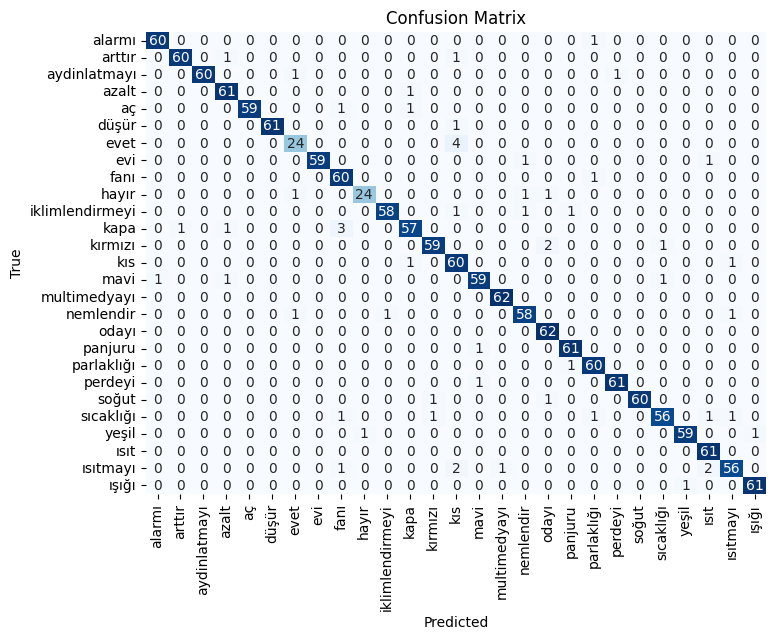

Best model saved: svc_model.joblib


In [4]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
import time
import os
from joblib import dump
import seaborn as sns
import matplotlib.pyplot as plt

# Data path
base_path = "kayıt-dosyaları"

# Collect file paths and labels
file_paths, labels = [], []
for class_folder in os.listdir(base_path):
    class_path = os.path.join(base_path, class_folder)
    if os.path.isdir(class_path):
        for file_name in os.listdir(class_path):
            if file_name.endswith(".wav"):
                file_paths.append(os.path.join(class_path, file_name))
                labels.append(class_folder)

print(f"Total {len(file_paths)} files loaded.")
print(f"Labels: {set(labels)}")

def augment_audio(audio, sr):
    """Audio augmentation methods: Add noise, change speed."""
    noise = np.random.normal(0, 0.01, len(audio))
    audio_with_noise = audio + noise
    audio_fast = librosa.effects.time_stretch(audio, rate=1.1)
    audio_slow = librosa.effects.time_stretch(audio, rate=0.9)
    return [audio_with_noise, audio_fast[:len(audio)], audio_slow[:len(audio)]]

def extract_rich_audio_features(file_path, n_mfcc=30):
    """Extract rich audio features."""
    try:
        audio, sr = librosa.load(file_path, sr=None)
        augmented_audios = augment_audio(audio, sr)
        features_list = []

        for augmented_audio in [audio] + augmented_audios:
            mfccs = librosa.feature.mfcc(y=augmented_audio, sr=sr, n_mfcc=n_mfcc)
            delta_mfcc = librosa.feature.delta(mfccs)
            delta2_mfcc = librosa.feature.delta(mfccs, order=2)
            spectral_contrast = librosa.feature.spectral_contrast(y=augmented_audio, sr=sr)

            features = np.concatenate([
                np.mean(mfccs, axis=1), np.std(mfccs, axis=1),
                np.mean(delta_mfcc, axis=1), np.std(delta_mfcc, axis=1),
                np.mean(delta2_mfcc, axis=1), np.std(delta2_mfcc, axis=1),
                np.mean(spectral_contrast, axis=1), np.std(spectral_contrast, axis=1)
            ])
            features_list.append(features)

        return features_list
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return []

# Feature extraction
ml_features, ml_labels = [], []
for file, label in zip(file_paths, labels):
    extracted_features = extract_rich_audio_features(file)  # Extract rich features
    for feature in extracted_features:
        ml_features.append(feature)
        ml_labels.append(label)

print(f"Valid ML feature count: {len(ml_features)}")

# Reshape features as numpy array
ml_features = np.array(ml_features)

# Convert labels to numeric format
ml_label_mapping = {label: idx for idx, label in enumerate(sorted(set(ml_labels)))}
ml_numeric_labels = [ml_label_mapping[label] for label in ml_labels]

# Create StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Model selection and cross-validation
models = {
    "Random Forest": RandomForestClassifier(n_estimators=500, random_state=42),
    "SVM": SVC(kernel='rbf', C=10, gamma='scale', class_weight='balanced', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=5000, class_weight='balanced', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

best_model = None
best_accuracy = 0

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    accuracies = []
    training_times = []
    test_times = []

    # Evaluate model with StratifiedKFold
    for train_idx, val_idx in skf.split(ml_features, ml_numeric_labels):
        X_train, X_val = ml_features[train_idx], ml_features[val_idx]
        y_train, y_val = np.array(ml_numeric_labels)[train_idx], np.array(ml_numeric_labels)[val_idx]

        # Handle data imbalance with SMOTE
        smote = SMOTE(random_state=42, k_neighbors=5)
        X_train, y_train = smote.fit_resample(X_train, y_train)

        # Standardization
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)

        # Feature selection
        k_best_features = min(1000, X_train.shape[1])
        selector = SelectKBest(score_func=f_classif, k=k_best_features)
        X_train = selector.fit_transform(X_train, y_train)
        X_val = selector.transform(X_val)

        # Model training and timing
        start_train = time.time()
        model.fit(X_train, y_train)
        end_train = time.time()
        training_times.append(end_train - start_train)

        # Model testing and timing
        start_test = time.time()
        accuracy = model.score(X_val, y_val)
        end_test = time.time()
        test_times.append(end_test - start_test)

        accuracies.append(accuracy)

    avg_accuracy = np.mean(accuracies)
    avg_training_time = np.mean(training_times)
    avg_test_time = np.mean(test_times)

    print(f"{model_name} Average Accuracy: {avg_accuracy:.2f}")
    print(f"{model_name} Average Training Time: {avg_training_time:.4f} seconds")
    print(f"{model_name} Average Test Time: {avg_test_time:.4f} seconds")

    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_model = model

# Select the best model
print(f"Best model: {best_model.__class__.__name__} (Average Accuracy: {best_accuracy:.2f})")

# Final predictions with the best model
X_train_final, X_val_final = ml_features[train_idx], ml_features[val_idx]
y_train_final, y_val_final = np.array(ml_numeric_labels)[train_idx], np.array(ml_numeric_labels)[val_idx]

# Apply SMOTE, standardization, and feature selection
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_final, y_train_final = smote.fit_resample(X_train_final, y_train_final)

scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_final)
X_val_final = scaler.transform(X_val_final)

selector = SelectKBest(score_func=f_classif, k=min(1000, X_train_final.shape[1]))
X_train_final = selector.fit_transform(X_train_final, y_train_final)
X_val_final = selector.transform(X_val_final)

# Train the best model
best_model.fit(X_train_final, y_train_final)

# Make predictions
y_pred = best_model.predict(X_val_final)

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_val_final, y_pred)
class_report = classification_report(y_val_final, y_pred)

# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(ml_label_mapping.keys()), yticklabels=list(ml_label_mapping.keys()), cbar=False)
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Save the best model
model_filename = f"{best_model.__class__.__name__.lower().replace(' ', '_')}_model.joblib"
dump(best_model, model_filename)
print(f"Best model saved: {model_filename}")


Total 3988 files loaded.
Labels: {'evi', 'hayır', 'düşür', 'alarmı', 'panjuru', 'aydinlatmayı', 'odayı', 'kapa', 'aç', 'parlaklığı', 'sıcaklığı', 'fanı', 'ısıt', 'kıs', 'yeşil', 'nemlendir', 'mavi', 'multimedyayı', 'evet', 'azalt', 'arttır', 'ışığı', 'perdeyi', 'soğut', 'ısıtmayı', 'kırmızı', 'iklimlendirmeyi'}
Label mapping successfully saved as: cnn_label_mapping.json
Valid features extracted: 3988
Epoch 1/50
100/100 [==============================] - 2s 16ms/step - loss: 3.4505 - accuracy: 0.0408 - val_loss: 3.2893 - val_accuracy: 0.0414
Epoch 2/50
100/100 [==============================] - 2s 16ms/step - loss: 3.2799 - accuracy: 0.0533 - val_loss: 3.2547 - val_accuracy: 0.0689
Epoch 3/50
100/100 [==============================] - 2s 16ms/step - loss: 3.2498 - accuracy: 0.0567 - val_loss: 3.2162 - val_accuracy: 0.0840
Epoch 4/50
100/100 [==============================] - 2s 16ms/step - loss: 3.2001 - accuracy: 0.0687 - val_loss: 3.1282 - val_accuracy: 0.0952
Epoch 5/50
100/100 [====

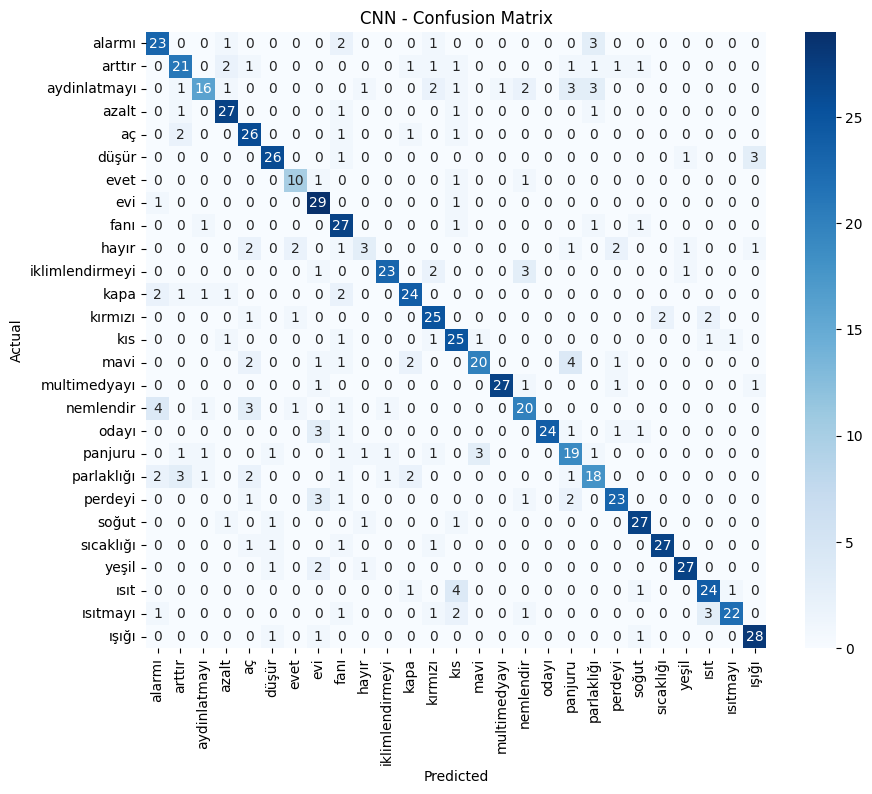

                 precision    recall  f1-score   support

         alarmı       0.70      0.77      0.73        30
         arttır       0.70      0.68      0.69        31
   aydinlatmayı       0.76      0.52      0.62        31
          azalt       0.79      0.87      0.83        31
             aç       0.67      0.84      0.74        31
          düşür       0.84      0.84      0.84        31
           evet       0.71      0.77      0.74        13
            evi       0.69      0.94      0.79        31
           fanı       0.61      0.87      0.72        31
          hayır       0.43      0.23      0.30        13
iklimlendirmeyi       0.88      0.77      0.82        30
           kapa       0.77      0.77      0.77        31
        kırmızı       0.71      0.81      0.76        31
            kıs       0.64      0.81      0.71        31
           mavi       0.83      0.65      0.73        31
   multimedyayı       0.96      0.87      0.92        31
      nemlendir       0.69    

In [5]:
import os
import warnings

# Suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Suppress Matplotlib warnings
warnings.filterwarnings("ignore", category=UserWarning, module='matplotlib')

import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import json
import time
import seaborn as sns

# Data path
base_path = "kayıt-dosyaları"

# Collect file paths and labels
file_paths, labels = [], []
for class_folder in os.listdir(base_path):
    class_path = os.path.join(base_path, class_folder)
    if os.path.isdir(class_path):
        for file_name in os.listdir(class_path):
            if file_name.endswith(".wav"):
                file_paths.append(os.path.join(class_path, file_name))
                labels.append(class_folder)

print(f"Total {len(file_paths)} files loaded.")
print(f"Labels: {set(labels)}")

# Create and save label mapping
label_mapping = {label: idx for idx, label in enumerate(sorted(set(labels)))}
with open("cnn_label_mapping.json", "w") as f:
    json.dump(label_mapping, f)
print("Label mapping successfully saved as: cnn_label_mapping.json")

# Feature extraction function
def extract_cnn_features(file_path, n_mfcc=30, max_pad_len=44):
    """Extracts MFCC features from audio files and pads to a fixed length."""
    try:
        audio, sr = librosa.load(file_path, sr=16000)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
        if mfccs.shape[1] < max_pad_len:
            mfccs = np.pad(mfccs, ((0, 0), (0, max_pad_len - mfccs.shape[1])), mode='constant')
        else:
            mfccs = mfccs[:, :max_pad_len]
        return mfccs
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Extract features
cnn_features, cnn_labels = [], []
for file, label in zip(file_paths, labels):
    feature = extract_cnn_features(file, n_mfcc=30, max_pad_len=44)
    if feature is not None:
        cnn_features.append(feature)
        cnn_labels.append(label_mapping[label])

print(f"Valid features extracted: {len(cnn_features)}")

# Convert to CNN input format
cnn_features = np.array(cnn_features)
cnn_features = cnn_features[..., np.newaxis]  # Add channel dimension (required for CNN)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    cnn_features,
    np.array(cnn_labels),
    test_size=0.2,
    stratify=cnn_labels,
    random_state=42
)

# Convert labels to categorical
y_train = to_categorical(y_train, num_classes=len(label_mapping))
y_test = to_categorical(y_test, num_classes=len(label_mapping))

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(cnn_features.shape[1], cnn_features.shape[2], 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(label_mapping), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    batch_size=32,
    callbacks=[early_stopping]
)

# Measure test time
start_time = time.time()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

end_time = time.time()

# Calculate test duration
test_duration = end_time - start_time
print(f"CNN Test Accuracy: {test_accuracy:.2f}")
print(f"Test Duration: {test_duration:.2f} seconds")

# Confusion matrix
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CNN - Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_test_labels, y_pred_labels, target_names=label_mapping.keys()))

# Save the model
model.save("cnn_model.h5")
print("Model successfully saved as: cnn_model.h5")